In [1]:
import pandas as pd
import numpy as np 
import os 
import glob

import os
import time
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import warnings 
import pandas as pd
warnings.filterwarnings('ignore')
import tensorflow as tf
from PIL import Image

In [2]:
os.chdir("/Users/hippolyteguigon/Projets-Kaggle/Data Science Bowl/")

train = pd.read_csv("stage1_train_labels.csv")
test = pd.read_csv("stage1_solution.csv")

## On commence par charger les images et explorer le train set

In [3]:
os.chdir("/Users/hippolyteguigon/Données projets Kaggle/Data Science Bowl/stage1_train")

X_train = []
y_train = []

file_viewed = [".DS_Store"]

for file in os.listdir():
    if file not in file_viewed:
        
        path = "/Users/hippolyteguigon/Données projets Kaggle/Data Science Bowl/stage1_train" + "/" + file + "/" + "images"
        os.chdir(path)
        file_viewed.append(file)
        for image in os.listdir():
            pil_image = Image.open(image)
            X_train.append(np.asarray(pil_image))
    os.chdir("/Users/hippolyteguigon/Données projets Kaggle/Data Science Bowl/stage1_train")

    

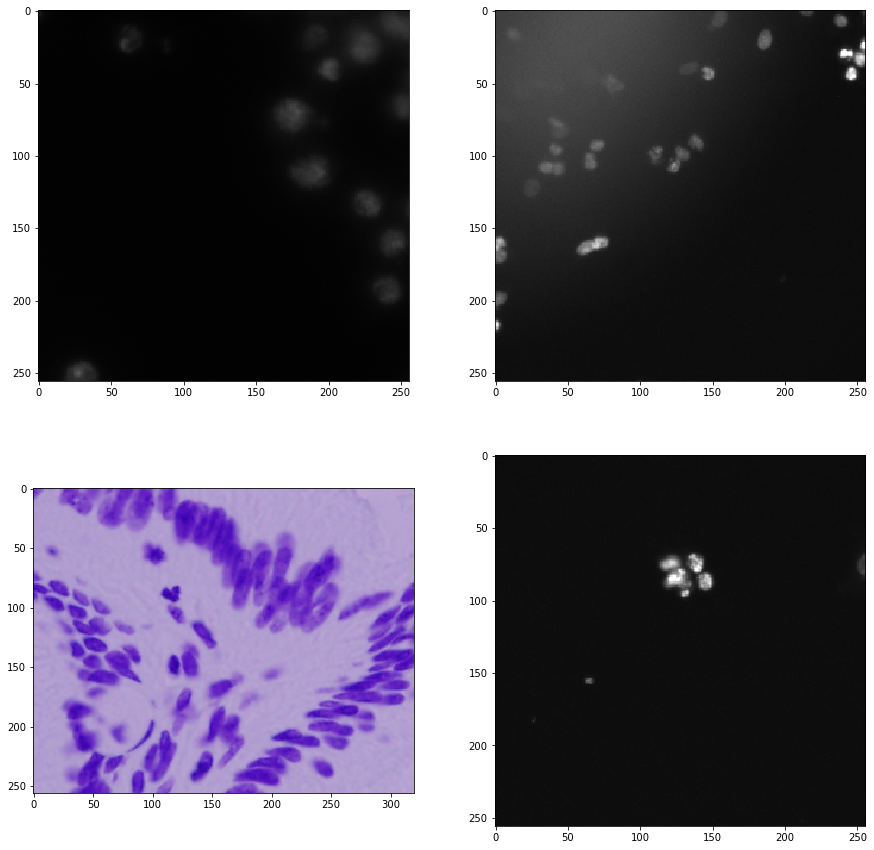

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].imshow(X_train[0], interpolation='nearest')

axs[0, 1].imshow(X_train[1], interpolation='nearest')

axs[1, 0].imshow(X_train[2], interpolation='nearest')

axs[1, 1].imshow(X_train[3], interpolation='nearest')

plt.show();

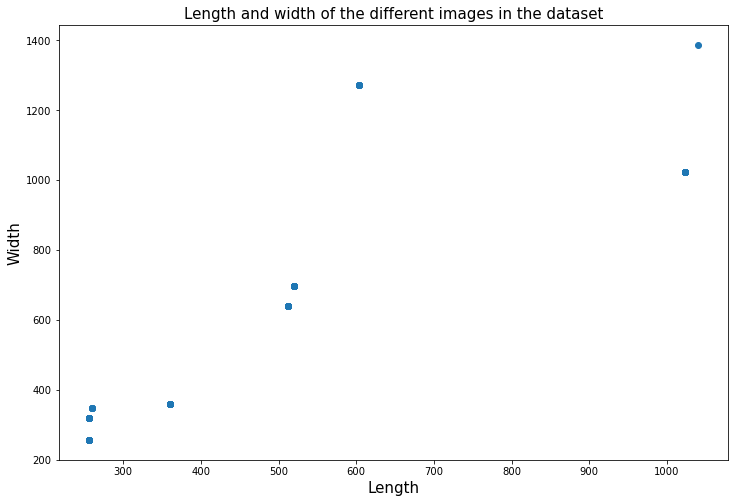

In [5]:
#On compare le format des différentes images

length = []

width = []

for image in X_train:
    length.append(image.shape[0])
    width.append(image.shape[1])
    
plt.figure(figsize=(12, 8))  
plt.title("Length and width of the different images in the dataset", fontsize=15)
plt.xlabel("Length", fontsize=15)
plt.ylabel("Width", fontsize=15)
plt.plot(length, width, 'o');

## On commence par mettre toutes les images au même format

In [6]:
Image_reshaped = []


for path in train["ImageId"]:
    os.chdir("/Users/hippolyteguigon/Données projets Kaggle/Data Science Bowl/stage1_train"+"/"+path+"/"+"images")



    for image in os.listdir():
        pil_image = Image.open(image)
        new_image = pil_image.resize((256, 256))
        Image_reshaped.append(np.asarray(new_image))

## On essaye une méthode de clustering pour détecter les zones avec des cellules

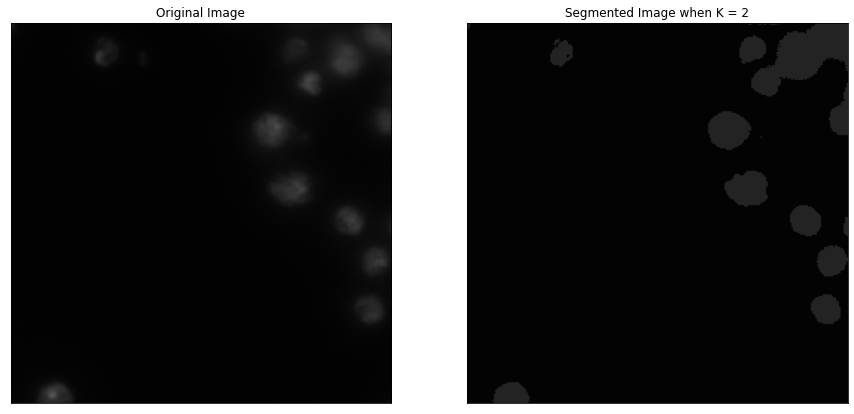

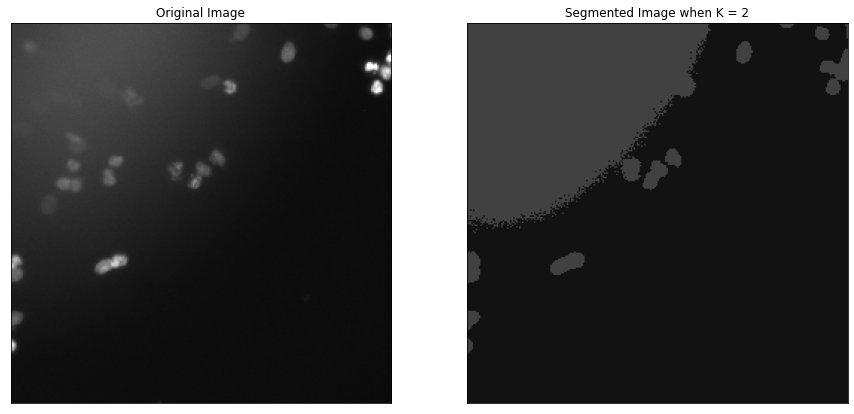

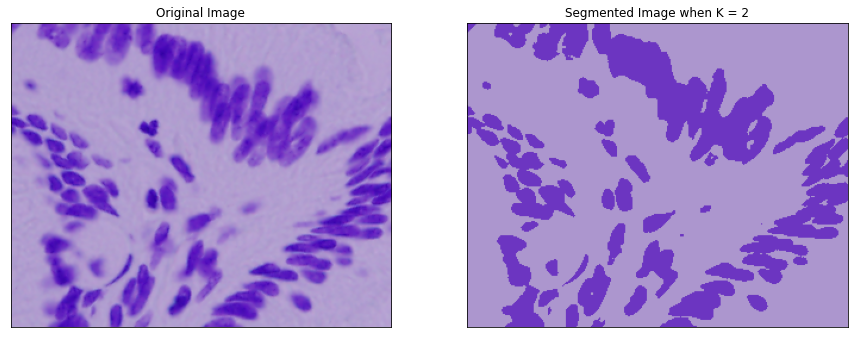

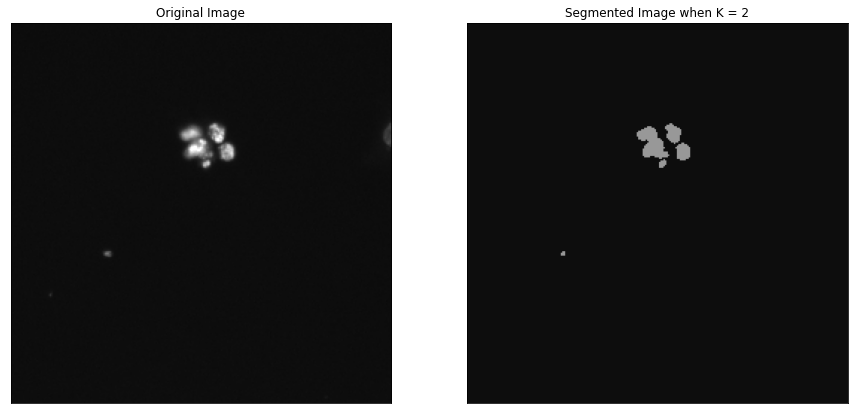

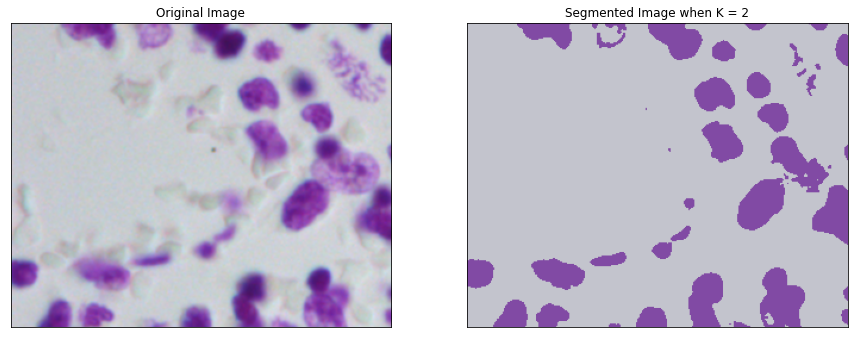

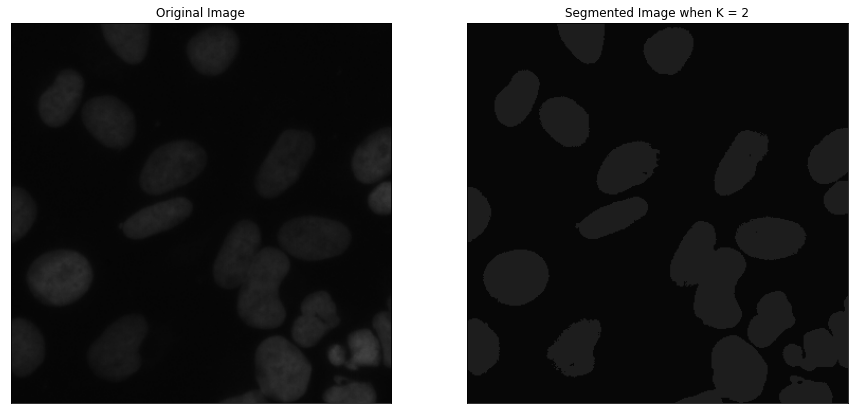

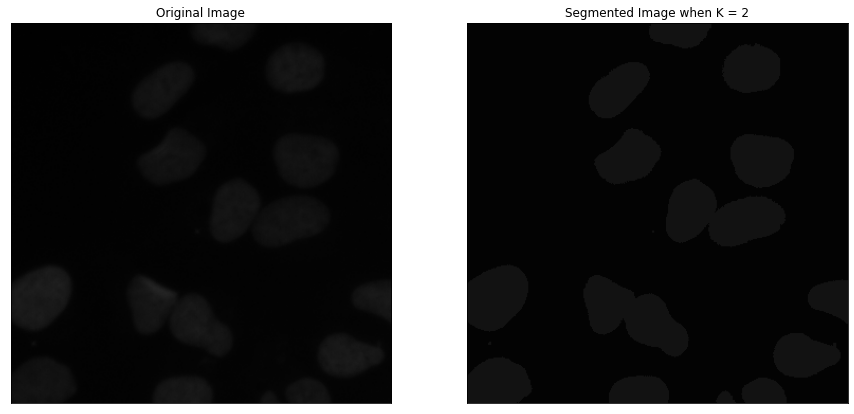

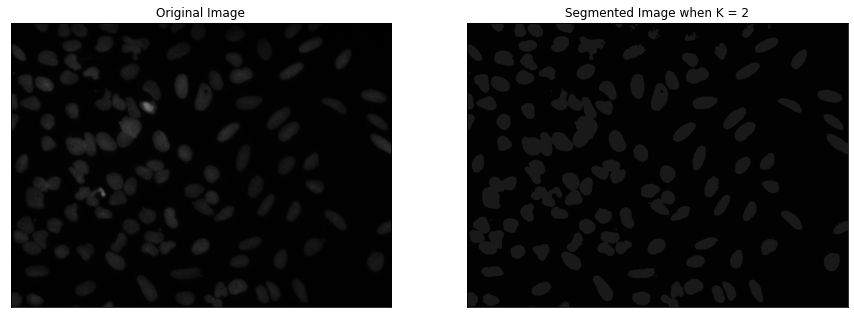

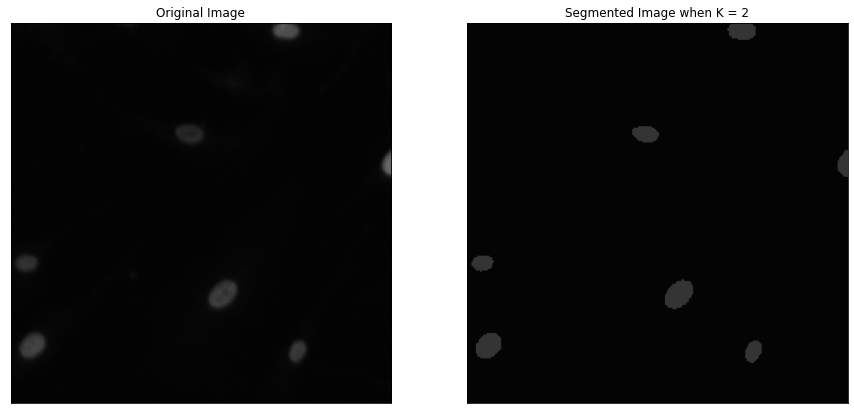

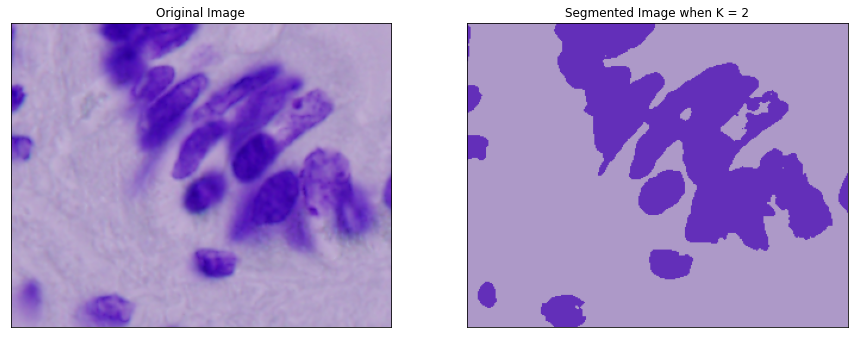

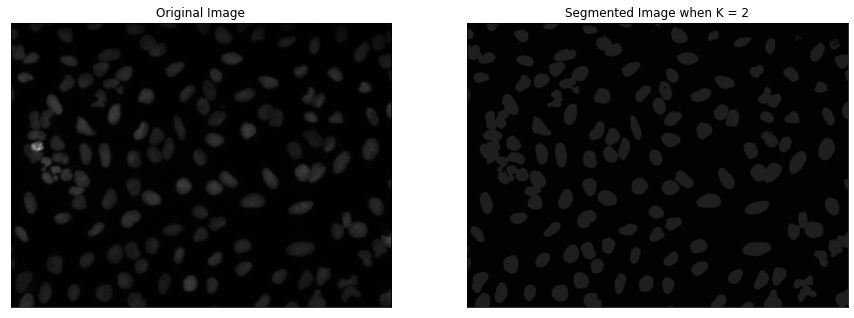

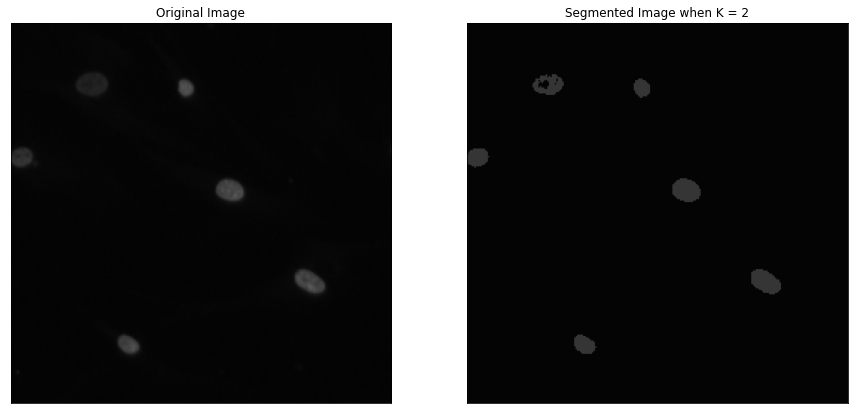

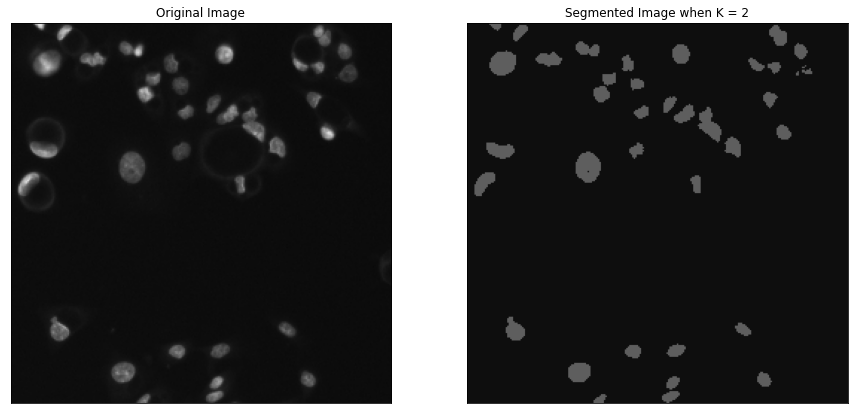

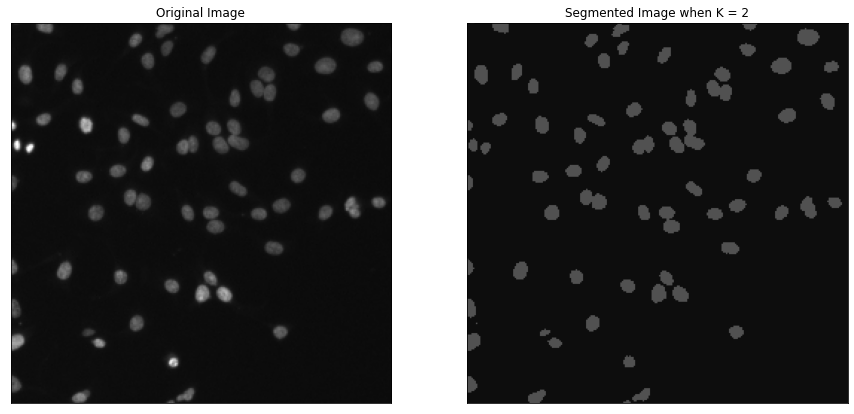

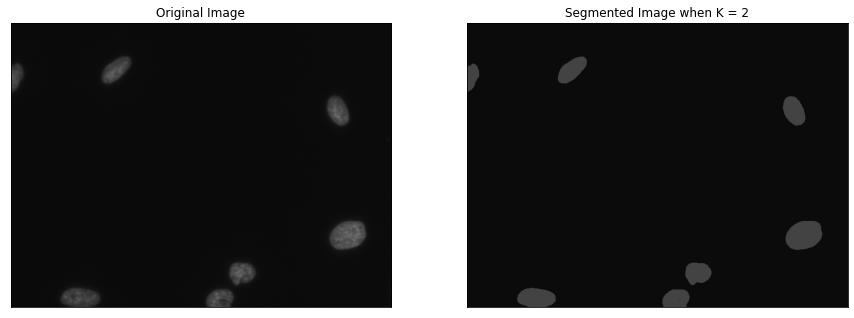

In [40]:
os.chdir("/Users/hippolyteguigon/Données projets Kaggle/Data Science Bowl/stage1_train")
os.listdir()

counter = 0


for name in os.listdir():
        
        
    counter += 1
        
    if counter > 15:
        break
            
            
    else:
        path = "/Users/hippolyteguigon/Données projets Kaggle/Data Science Bowl/stage1_train" + "/" + name + "/" + "images"
    
        os.chdir(path)

        original_image = cv2.imread(os.listdir()[0])
        img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
        vectorized = img.reshape((-1,3))
        vectorized = np.float32(vectorized)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

        K = 2
        attempts=10
        ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

        center = np.uint8(center)

        res = center[label.flatten()]
        result_image = res.reshape((img.shape))


        figure_size = 15
        plt.figure(figsize=(figure_size,figure_size))
        plt.subplot(1,2,1),plt.imshow(img)
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(1,2,2),plt.imshow(result_image)
        plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
        plt.show()